# 타이타닉 승객중 누가 생존 가능성이 높았을까?



![titanic](https://w.namu.la/s/63c67dc94a526f4073ddb9bdb317d396bce24d17b25cc8f332c55eaed6d10c1c9e055b7c58d46c3c9055f49b31c1c1e271ffc65415d134009757935a8637566ea5bab06de55ed95864c558745055c1d326669fd4525e80538ed0831ee1e14dff)

## 타이타닉 침몰 사고

여객선 타이타닉호는 1912년 4월 15일 영국에서 출항해 빙산에 충돌해 침몰했고 많은 사망자가 있었던 비극적인 사건이다.
이 때 탑승했던 승객들의 정보로 당시 사건에 대해 알아보자.
물론 우리에겐 레오나르도 디카프리오와 케이트 윈슬렛이 출연한 1997년작 영화 '타이타닉'으로 이 사건을 모르는 사람은 없겠으나 승객들의 정보로 영화에서 볼 수 없던 이야기를 찾아보면 또다른 재미를 느낄 수 있으리라.

타이타닉 데이터를 보기 전에 나는 기록된 데이터로 분석을 하고 그 안에서 인사이트를 찾아내는 데이터 사이언스 과정을 공부한지 얼마 되지 않았다.
아직 본격적인 공부를 시작하기 전에 데이터분석을 어떻게, 어떤 과정으로 무슨 이야기를 알아낼 수 있는지 스스로 부딪혀 보고자 이 글을 쓴다.
시간이 지나 다시 봤을 때 데이터 분석 공부를 제대로 시작하기 전에 어떤 전개로 생각을 하고 분석해 나갔는지 알 수 있을테고 그를 바탕으로 배워갈 때 도움을 얻을 수 있다고 기대한다.

자, 이제 나는 내 나름대로 과정을 정해서 하나씩 분석을 시작할 것이고 이후에 데이터 분석에 대한 배움을 쌓은 뒤에 다시 분석하고 이 내용을 비교해볼 것이다.





In [137]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 타이타닉 데이터 불러오기
df = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [138]:
df.shape

(887, 8)

## 데이터셋 확인하기

이 타이타닉 데이터를 보면 아래 8가지 승객 정보를 알 수 있다.
* 승객수 총 887명 (실 탑승자 2,224명이므로 약 40%의 승객 데이터)
* 생존여부
* 객실등급
* 승객 이름
* 성별
* 나이
* 형제자매, 배우자 탑승여부
* 부모, 자녀 탑승 여부
* 탑승권 요금

## 데이터 분석 목적

이 데이터를 통해서 다음 3가지를 확인하고자한다.

1. 생존과 사망에 영향을 미치는 승객 정보는 무엇이 있는가?
2. 변수들의 연관성으로 새로운 사실을 도출한다.
3. 알아낸 사실을 적절한 시각자료로 이해를 높인다



In [139]:
# 데이터 자료형을 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


### 데이터 자료 목록

데이터셋에 8개의 변수중
* 정수나 실수인 변수가 6개
* 문자형 변수가 2개

여기서 자료형이 정수나 실수지만 수치형 데이터가 아니라 하나의 레벨 값을 나타내는 변수들이 있다.   
예를들어 성별은 문자형이지만 범주형에 속한다. (아래 테이블 참고)

| 수치형 | 범주형 |     
| :---: | :---: | 
| Age | Survived |
| Fare | Pclass |
| Siblings/Spouses Aboard | Sex |
| Parents/Children Aboard |  |


In [140]:
# 수치형 데이터 변수별로 분포 확인

df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [141]:
# 범주형 데이터 변수별로 데이터 분포 확인

df.describe(include=['O'])

,Name,Sex
count,887,887
unique,887,2
top,Miss. Alice Elizabeth Fortune,male
freq,1,573


#### 데이터 분포를 통해서 알 수 있는 점

데이터 분포를 확인해서 변수별로 타이타닉 승객을 어떻게 구분할 수 있는지 확인해보았다.

* 사망자가 전체 중 61%이다.
* 남성 승객이 전체 인원중 64%이다.
* 3등실에 승객이 전체 중 55%이다.
* 배에 탑승 연령대는 20~38살이다.
* 약 70% 이상의 승객이 형제자매, 배우자, 부모, 자녀들 없이 탑승했다.
* 극소수의 사람들이 $512를 요금으로 지불했다.   


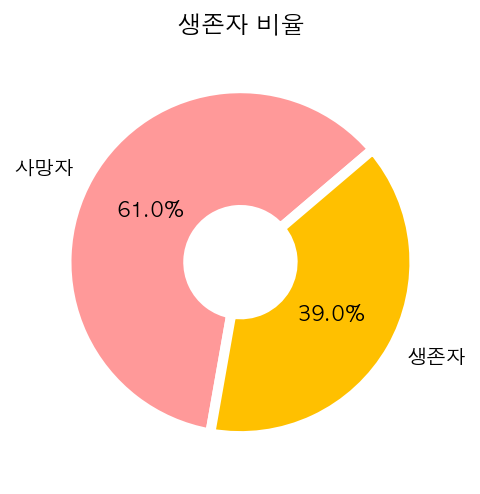

In [176]:
# 그래프를 선명하게 설정
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# 한글 폰트가 깨지지 않도록 설정
plt.rc("font",family="AppleGothic")

# matplotlib에 pie 그래프를 활용하여 표현
ratio = [61, 39]
labels = ['사망자', '생존자']
colors = ['#ff9999', '#ffc000']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.title('생존자 비율')
plt.show()

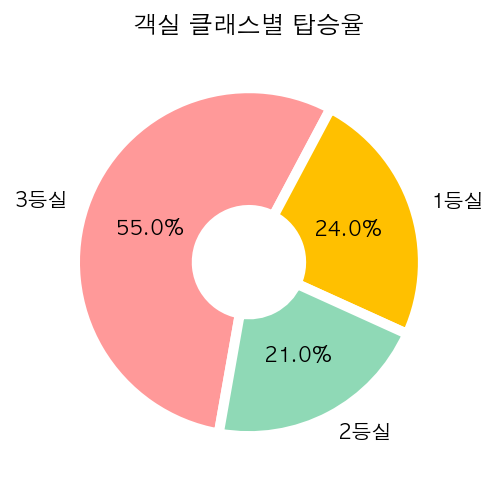

In [130]:
ratio = [55, 24, 21]
labels = ['3등실', '1등실', '2등실']
colors = ['#ff9999', '#ffc000', '#8fd9b6']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.title('객실 클래스별 탑승율')
plt.show()

### 승객들의 구분에 따라 생존여부에 어떤 영향을 미쳤는지 확인

위에서 승객들이 어떤 구분에 따라 분포하는지 확인해보았다.
이제 각 구분에 따라 생존율에 어떤 연관성이 있는지 확인해 볼 예정이다.   
groupby를 사용해서 생존한 평균값을 확인해서 찾아보도록 한다.

In [149]:
# 생존자 수와 성별과의 연관성 확인

df[['Sex','Survived']].groupby('Sex', as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.190227


In [153]:
# 탑승구역과 생존자 수의 연관성 확인

df[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.244353


In [160]:
# 나이와 생존자 수의 연관성 확인을 위해서 연령대 컬럼을 새로 생성

df['Ageband'] = pd.cut(df.Age, bins = [0, 13, 20, 30, 40, 50,60,70,80], labels = ['유아','청소년','20대','30대','40대','50대','60대','70대'])
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Ageband
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,20대
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,30대
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,20대
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,30대
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,30대


In [165]:
# 나이와 생존자 수의 연관성 확인

df[['Ageband', 'Survived']].groupby(['Ageband'], as_index = False).mean()

,Ageband,Survived
0,유아,0.555556
1,청소년,0.340426
2,20대,0.343234
3,30대,0.434783
4,40대,0.405660
5,50대,0.369565
6,60대,0.190476
7,70대,0.200000


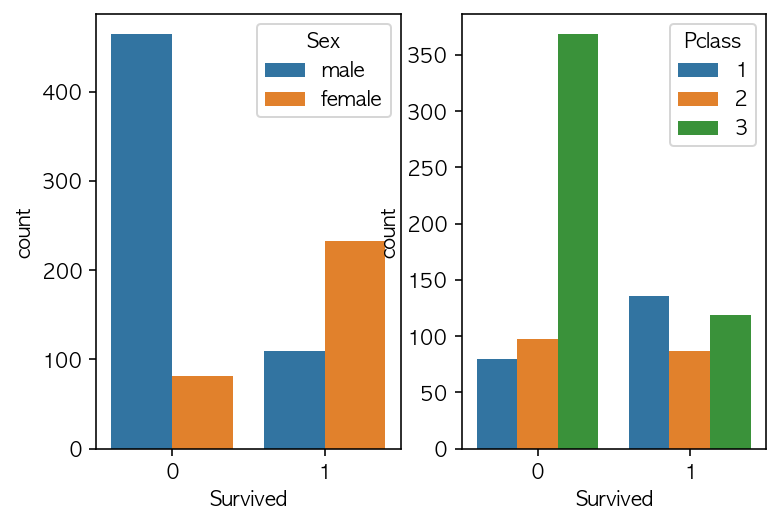

In [178]:
# 두 그래프를 동시에 보기 위해 공간 설정
fig, ax = plt.subplots(ncols=2)

# 성별에 따른 생존자 수 시각화
sns.countplot(x='Survived', hue = 'Sex', data = df, ax=ax[0])

# 탑승구역에 따른 생존자 수 시각화
sns.countplot(x='Survived', hue = 'Pclass', data = df, ax=ax[1])

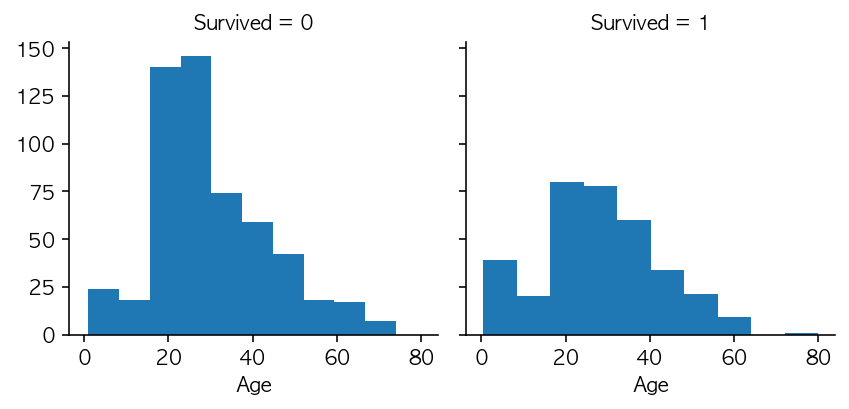

In [180]:
grid = sns.FacetGrid(data=df, col='Survived')
grid.map(plt.hist, 'Age', bins = 10)

# 결론

* 여성이 남성보다 생존 가능성이 높았다.
* 1등실 승객들이 가장 생존율이 높았고 이어 2등실, 3등실 승객순이었다.
   상류층 사람들이 생존 가능성이 높다는걸 알 수있다.
* 연령대만 봤을 때 큰 차이는 없지만 어린아이들과 3-40대 연령대의 생존 가능성이 높았다.
* 생존자와 사망자의 연령대 그래프를 봤을 때 높낮이가 같은걸 봐서 탑승 연령 비율대로 나뉜것으로 볼 수 있다.

더 깊은 내용을 분석하고 인사이트를 찾을 수 있겠지만 현재 처음 데이터 분석을 시도해보면서 작성한 만큼 파악할 수 있었다.

### 성별
그래프를 보면 여성 생존자가 남성 생존자보다 월등히 높음을 알 수 있다.   
영화나 여러 곳에서 쉽게 들을 수 있는 'Lady first'가 이렇듯 여성이 더 많이 생존했음을 보고 맞다는 것을 알 수 있다.

### 연령
연령을 보면 10대이하의 어린아이들이 큰 차이를 보이며 생존자 수가 더 많다는걸 알 수 있다.
여성과 마찬가지로 당시 약자인 어린아이들이 살 수 있는 가능성이 더 높았다고 볼 수 있는 지점이다.

### 탑승실 등급
당시 타이타닉호에는 고령자보다 2-30대의 젊은 사람들이 많았음을 알 수 있고 그 이유 때문인지 3등실 사람 수가 가장 많았다.
또 다른 면으로는 탑승실 인원수는 사회에있는 계층 순위 비율과 비슷하게 있지 않았을까 생각해볼 수도 있을 것 같다.

하지만 사망자수를 보면 1,2등실 사람들은 사망자수와 생존자 수가 비슷한 양상을 보이지만 3등실 사람들이 가장 높은 수로 사망한 것을 볼 수 있다.
1등실 사람들은 사망자보다 생존자가 더 많았으며 2등실은 엇비슷하다. 탑승실 등급에 따라 사망자와 생존자 수가 차이나는걸 보아   
영화에서처럼 등급별 객실의 접근법이나 몇 안되는 구명보트를 탈 때 탑승실 등급에 따라 영향이 미쳤을 수도있다는 근거가 될 수 있지않을까?
   
이보다 더 깊이 있는 인사이트와 시각화를 추후에 다시 분석해보면서 오늘 한 분석과 다시 비교해보는 글을 작성하도록 할 것이다.